In [2]:
import numpy as np
import pydicom
from skimage import exposure
from matplotlib import pyplot as plt
import imageProcessing as imgProc

In [14]:
img = pydicom.dcmread('/mnt/d/ImagensDatasetFredrik/00530_20990909_R_CC_1.dcm')
img = np.array(img.pixel_array)
nroBits = np.max(img)
imgArray = img

# Calculando o Histograma da Imagem 
* Obs: A imagem e 16bits, portanto a faixa de valores é muito maior que o normal de outras imagens, portante eh necessario calcular atraves de outras bibliotecas, opencv nao funciona.
#### # Histograma 
`Histograma eh um grafico de barras que demonstra uma distribuicao de frequencias de uma determinado tipo de variavel`
* No processamento de imagens:
- Representa um grafico de frequencias de intensidade de pixels na imagem. Representa o numero de pixels para cada intensidade de valor considerado.

## Normalização da Imagem: 
##### Equação:
$xnorm=\frac{x-xmin}{xmax-xmin}$

In [15]:
# Normalizando imagem
imgNormalized = imgArray/4095

In [16]:
imgEqHist = exposure.equalize_hist(imgNormalized, nbins=np.max(imgArray))
imgEqAdaptHist = exposure.equalize_adapthist(imgNormalized, nbins=np.max(imgArray), clip_limit=0.6)
#hist, bin = np.histogram(imgEqHist.ravel(), bins=bits, range=np.max(imgArray))

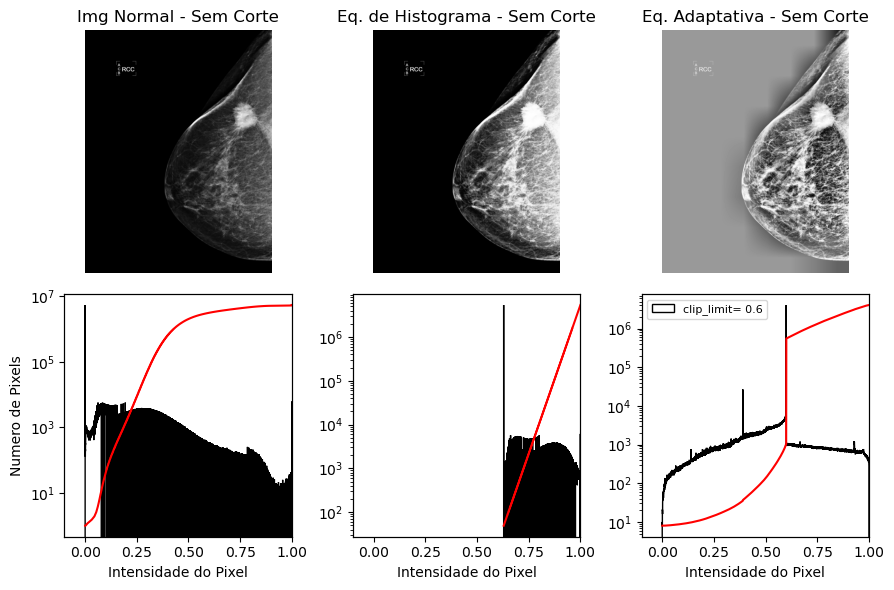

In [17]:
# Cria axis
fig, axes = imgProc.cria_Axis(plt.figure(figsize=(9, 6)))
  
# Imagem Normal, sem nenhuma Equalizacao
axeImg, axeHist, axeCdf = imgProc.plot_Img_And_Hist(imgNormalized, axes[:, 0])
axeImg.set_title('Img Normal - Sem Corte')
axeHist.set_ylabel('Numero de Pixels')

# Imagem com Equalizacao de Histograma
axeImg, axeHist, axeCdf = imgProc.plot_Img_And_Hist(imgEqHist, axes[:, 1])
axeImg.set_title('Eq. de Histograma - Sem Corte')

# Imagem com Equalizacao Adaptativa de Histograma
axeImg, axeHist, axeCdf = imgProc.plot_Img_And_Hist(imgEqAdaptHist, axes[:, 2])
axeImg.set_title('Eq. Adaptativa - Sem Corte')
axeHist.legend(['clip_limit= 0.6'], fontsize=8,loc=2)

fig.tight_layout()
plt.show()

In [19]:
# Cortando imagem
imgArray = imgProc.croped_Img_With_Threshold(img)
# Normalizar
imgNormalized = imgArray/4095
# Equalizacao Histograma
imgEqHist = exposure.equalize_hist(imgNormalized, nbins=np.max(imgArray))
imgEqAdaptHist = exposure.equalize_adapthist(imgNormalized, nbins=np.max(imgArray), clip_limit=0.6)

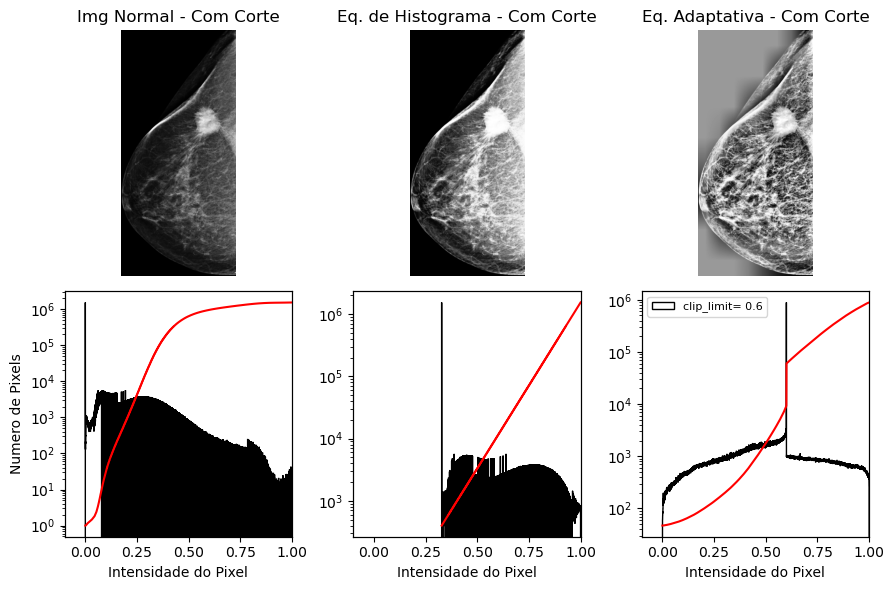

In [20]:
# Axis
fig, axes = imgProc.cria_Axis(plt.figure(figsize=(9, 6)))

# Imagem Normal, sem nenhuma Equalizacao
axeImg, axeHist, axeCdf = imgProc.plot_Img_And_Hist(imgNormalized, axes[:, 0])
axeImg.set_title('Img Normal - Com Corte')
axeHist.set_ylabel('Numero de Pixels')

# Imagem com Equalizacao de Histograma
axeImg, axeHist, axeCdf = imgProc.plot_Img_And_Hist(imgEqHist, axes[:, 1])
axeImg.set_title('Eq. de Histograma - Com Corte')

# Imagem com Equalizacao Adaptativa de Histograma
axeImg, axeHist, axeCdf = imgProc.plot_Img_And_Hist(imgEqAdaptHist, axes[:, 2])
axeImg.set_title('Eq. Adaptativa - Com Corte')
axeHist.legend(['clip_limit= 0.6'], fontsize=8,loc=2)

fig.tight_layout()
plt.show()